In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from copy import deepcopy

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

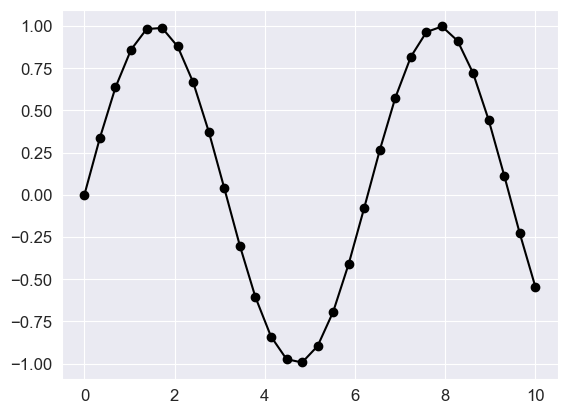

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, '-ok');

In [3]:
import pandas as pd

# Create DataFrame
data = pd.DataFrame([
    [1, 'Joe', 70000, 3],
    [2, 'Henry', 80000, 4],
    [3, 'Sam', 60000, None],
    [4, 'Max', 90000, None]
], columns=['id', 'name', 'salary', 'managerId'])

data

,id,name,salary,managerId
0,1,Joe,70000,3.0
1,2,Henry,80000,4.0
2,3,Sam,60000,NaN
3,4,Max,90000,NaN


In [4]:
def fqa(df):
    for x in df['id']:
        if x in df['managerId'].values:
            manager_salary = df.loc[df['id'] == x, 'salary'].values[0]
            employee_salaries = df.loc[df['managerId'] == x, 'salary']
            for y in employee_salaries:
                if y > manager_salary:
                    print(df.loc[df['salary'] == y, 'name'].values[0])

fqa(data)

Joe


In [5]:
import pandas as pd

# Create DataFrame
data = {'id': [1, 2, 3, 4], 
        'name': ['Joe', 'Henry', 'Sam', 'Max'], 
        'salary': [70000, 80000, 60000, 90000], 
        'managerId': [3, 4, None, None]}
df = pd.DataFrame(data)

df

,id,name,salary,managerId
0,1,Joe,70000,3.0
1,2,Henry,80000,4.0
2,3,Sam,60000,NaN
3,4,Max,90000,NaN


In [6]:
# Perform self join on 'id' and 'managerId'
df_joined = df.merge(df, left_on='managerId', right_on='id', suffixes=('_employee', '_manager'))
df_joined

,id_employee,name_employee,salary_employee,managerId_employee,id_manager,name_manager,salary_manager,managerId_manager
0,1,Joe,70000,3.0,3,Sam,60000,NaN
1,2,Henry,80000,4.0,4,Max,90000,NaN


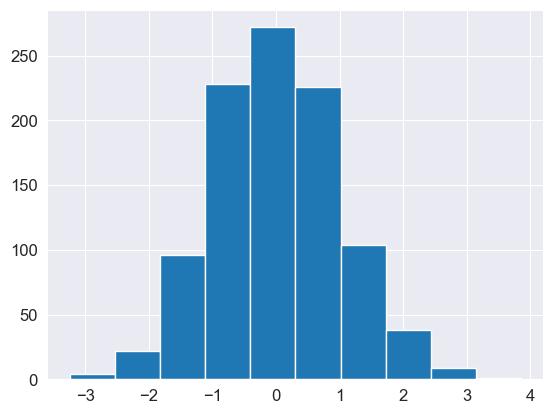

In [7]:
data = np.random.randn(1000)
plt.hist(data);

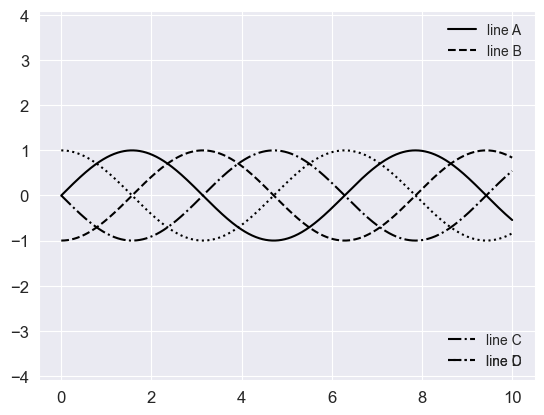

In [8]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    
        
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
    styles[i], color='black')
    ax.axis('equal')
 # specify the lines and labels of the first legend
    ax.legend(lines[:2], ['line A', 'line B'],
    loc='upper right', frameon=False)
 # Create the second legend and add the artist manually.
    from matplotlib.legend import Legend
    leg = Legend(ax, lines[2:], ['line C', 'line D'],
    loc='lower right', frameon=False)
    ax.add_artist(leg);

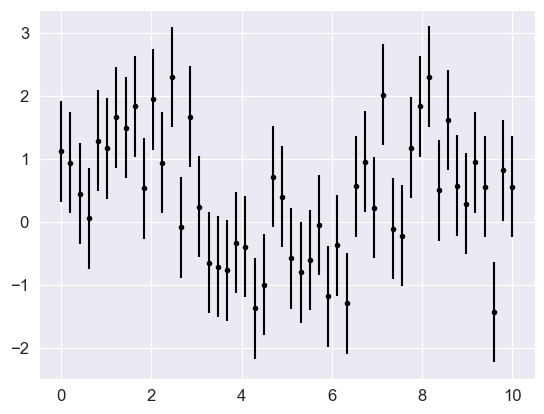

In [9]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

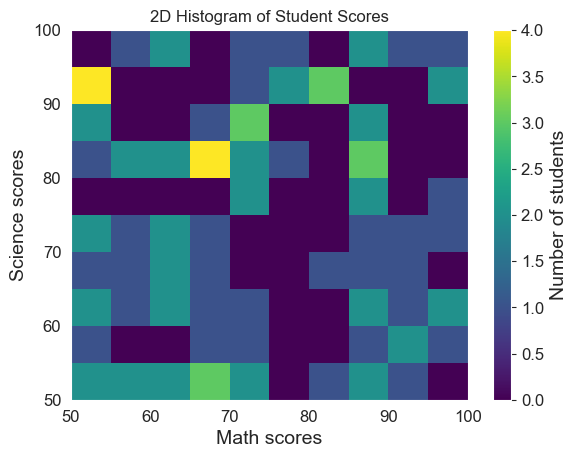

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random student scores for math and science
np.random.seed(0)
math_scores = np.random.randint(50, 100, 100)
science_scores = np.random.randint(50, 100, 100)

# Create 2D histogram
plt.hist2d(math_scores, science_scores, range=[[50, 100], [50, 100]], cmap='viridis')

# Add colorbar and labels
plt.colorbar(label='Number of students')
plt.xlabel('Math scores')
plt.ylabel('Science scores')
plt.title('2D Histogram of Student Scores')

plt.show()

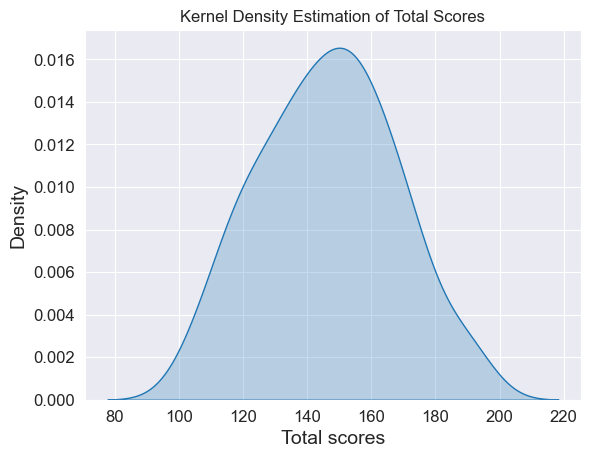

In [11]:
import seaborn as sns

# Combine math and science scores into total scores
total_scores = math_scores + science_scores

# Create KDE plot
sns.kdeplot(total_scores, fill=True)

plt.xlabel('Total scores')
plt.title('Kernel Density Estimation of Total Scores')

plt.show()

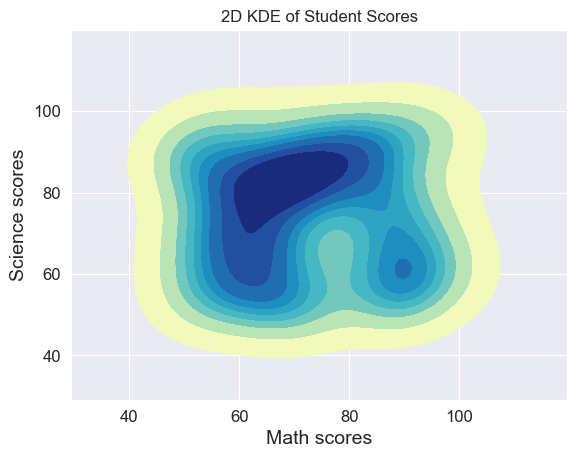

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random student scores for math and science
np.random.seed(0)
math_scores = np.random.randint(50, 100, 100)
science_scores = np.random.randint(50, 100, 100)

# Create 2D KDE plot
sns.kdeplot(x=math_scores, y=science_scores, cmap='YlGnBu', fill=True)

plt.xlabel('Math scores')
plt.ylabel('Science scores')
plt.title('2D KDE of Student Scores')

plt.show()

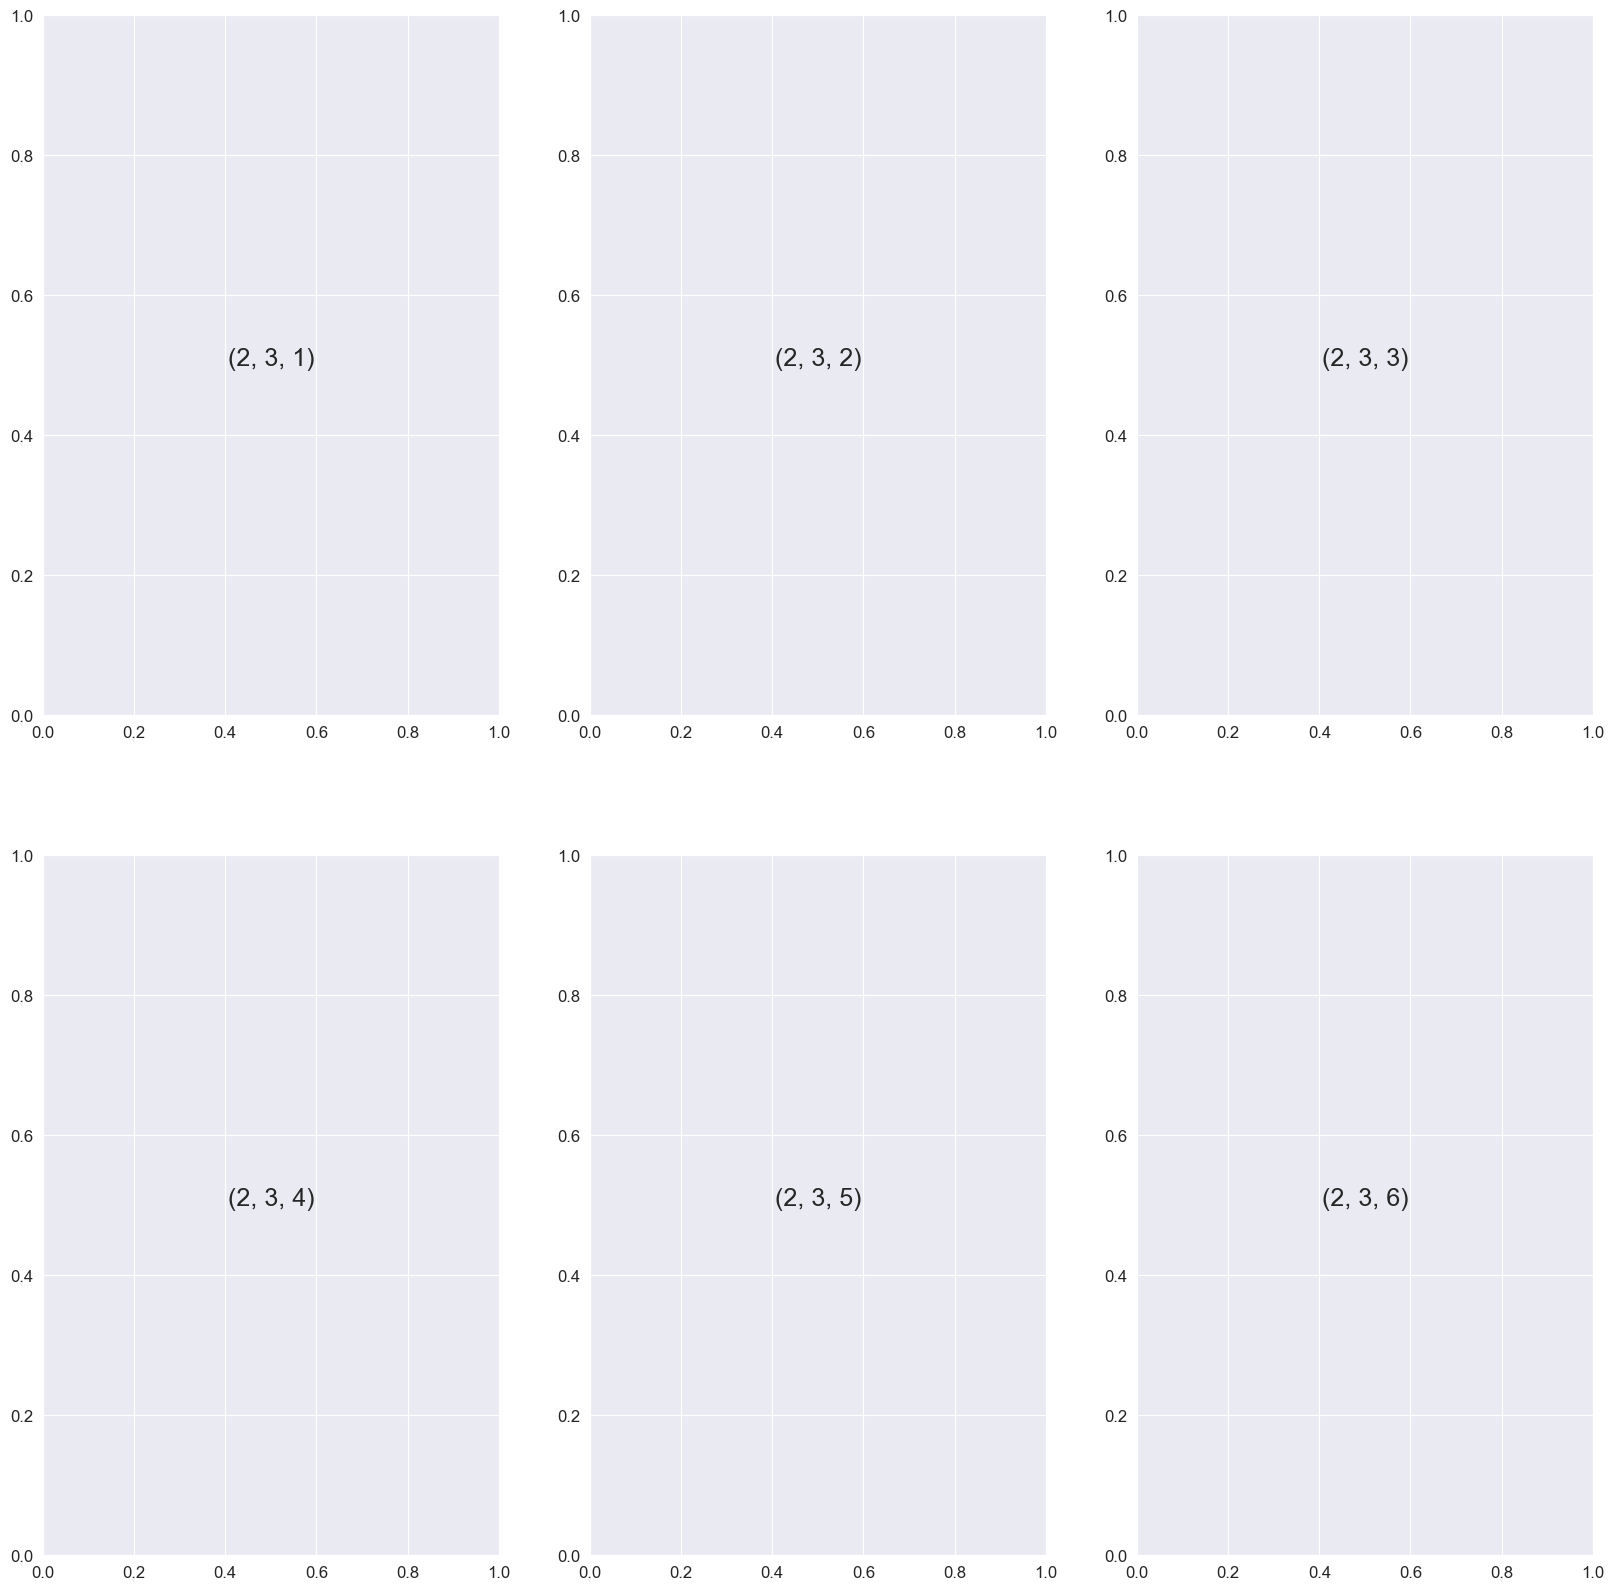

In [13]:
plt.figure(figsize=(20,20))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

# project 

In [14]:
# Example of data gathering
import pandas as pd
import yfinance as yf

# Download historical data for desired ticker
data = yf.download('AAPL', start='2010-01-01', end='2023-10-30')

# Check the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3479 entries, 2010-01-04 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3479 non-null   float64
 1   High       3479 non-null   float64
 2   Low        3479 non-null   float64
 3   Close      3479 non-null   float64
 4   Adj Close  3479 non-null   float64
 5   Volume     3479 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.3 KB


In [16]:
data.reset_index(inplace=True)

In [17]:
pd.isna(data).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

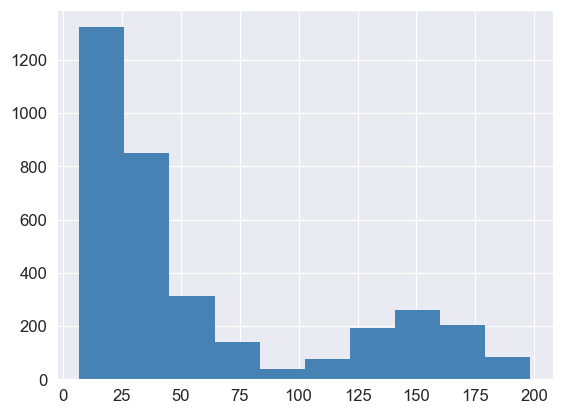

In [18]:
plt.hist(data['High'] , histtype='stepfilled', color='steelblue',
edgecolor='none');

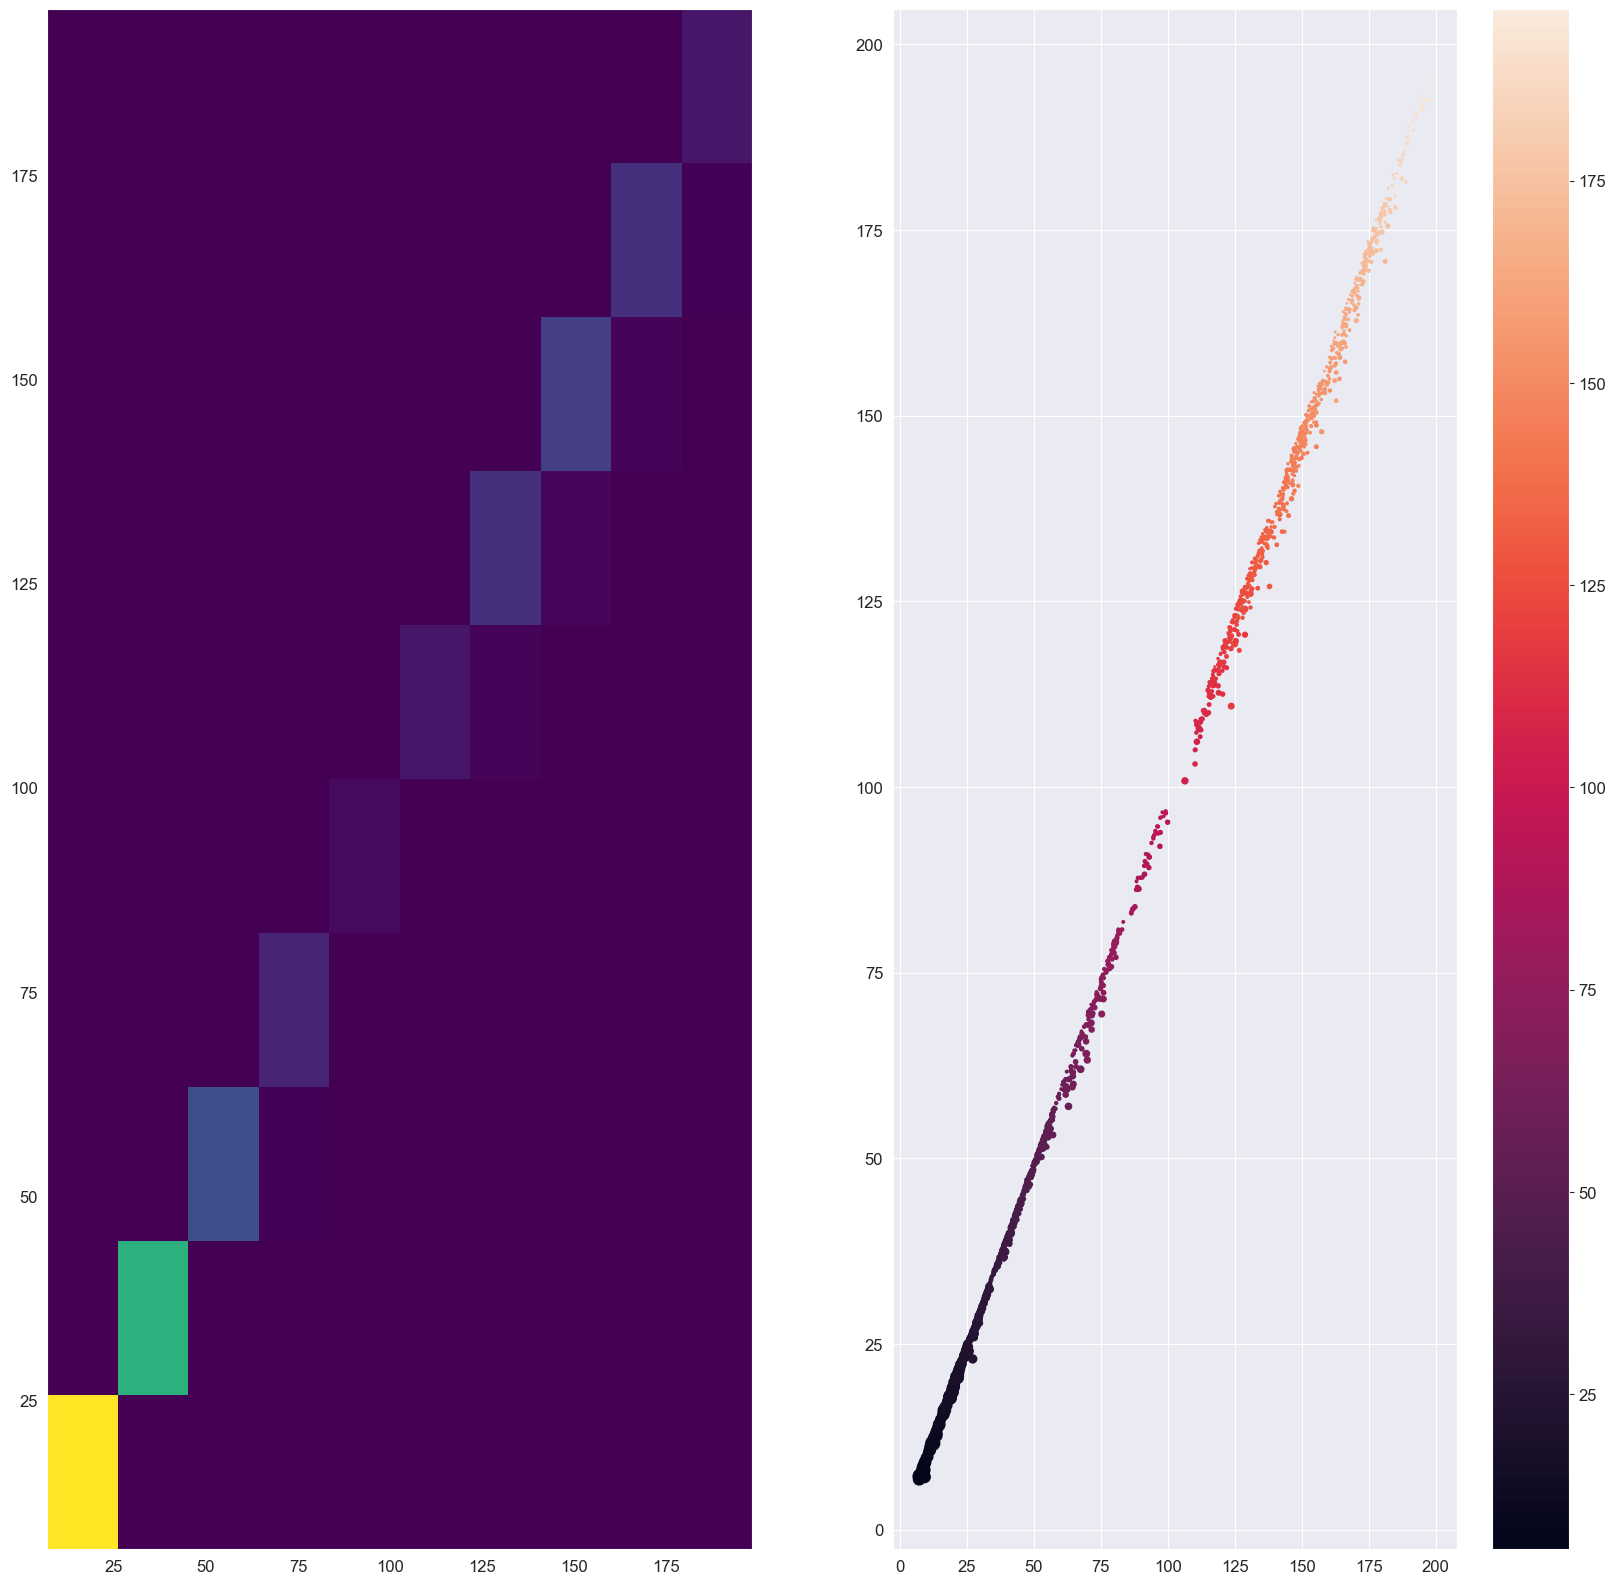

In [19]:
fig , (ax1 , ax2) = plt.subplots(1,2,figsize=(20,20))

ax1.hist2d(data['High'],data['Low'],cmap='viridis')


from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
data['Volume_scaled'] = scaler.fit_transform(data['Volume'].values.reshape(-1,1))

sc = ax2.scatter(data['High'], data['Low'], s=data['Volume_scaled']*100, c=data['Adj Close'])
fig.colorbar(sc, ax=ax2)


In [20]:
data['Week_Number'] = data['Date'].dt.isocalendar().week 
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.pivot_table('High',['month','Week_Number'])


High
month Week_Number           
1     1            58.461024
      2            53.797270
      3            52.906458
      4            56.390137
      5            46.010893
...                      ...
12    49           57.362817
      50           57.941363
      51           55.886389
      52           58.890893
      53           81.884063

[70 rows x 1 columns]

<Axes: xlabel='month'>

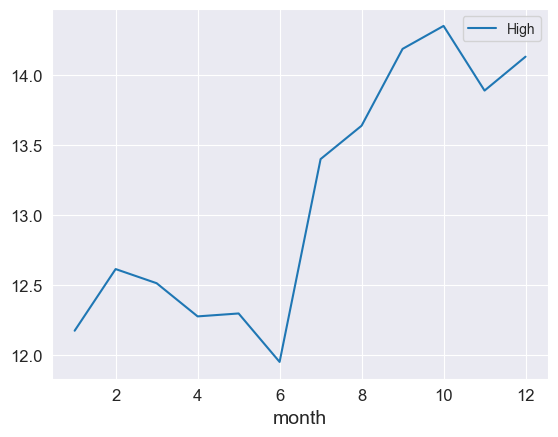

In [21]:
# Create the pivot table using 'year', 'Month', and 'Day_of_Week' as the index
pivot = data.pivot_table('High',['year', 'month'])

# Select the data for 2011 and plot it
pivot.loc[2011].plot()

<Axes: xlabel='Full_Date'>

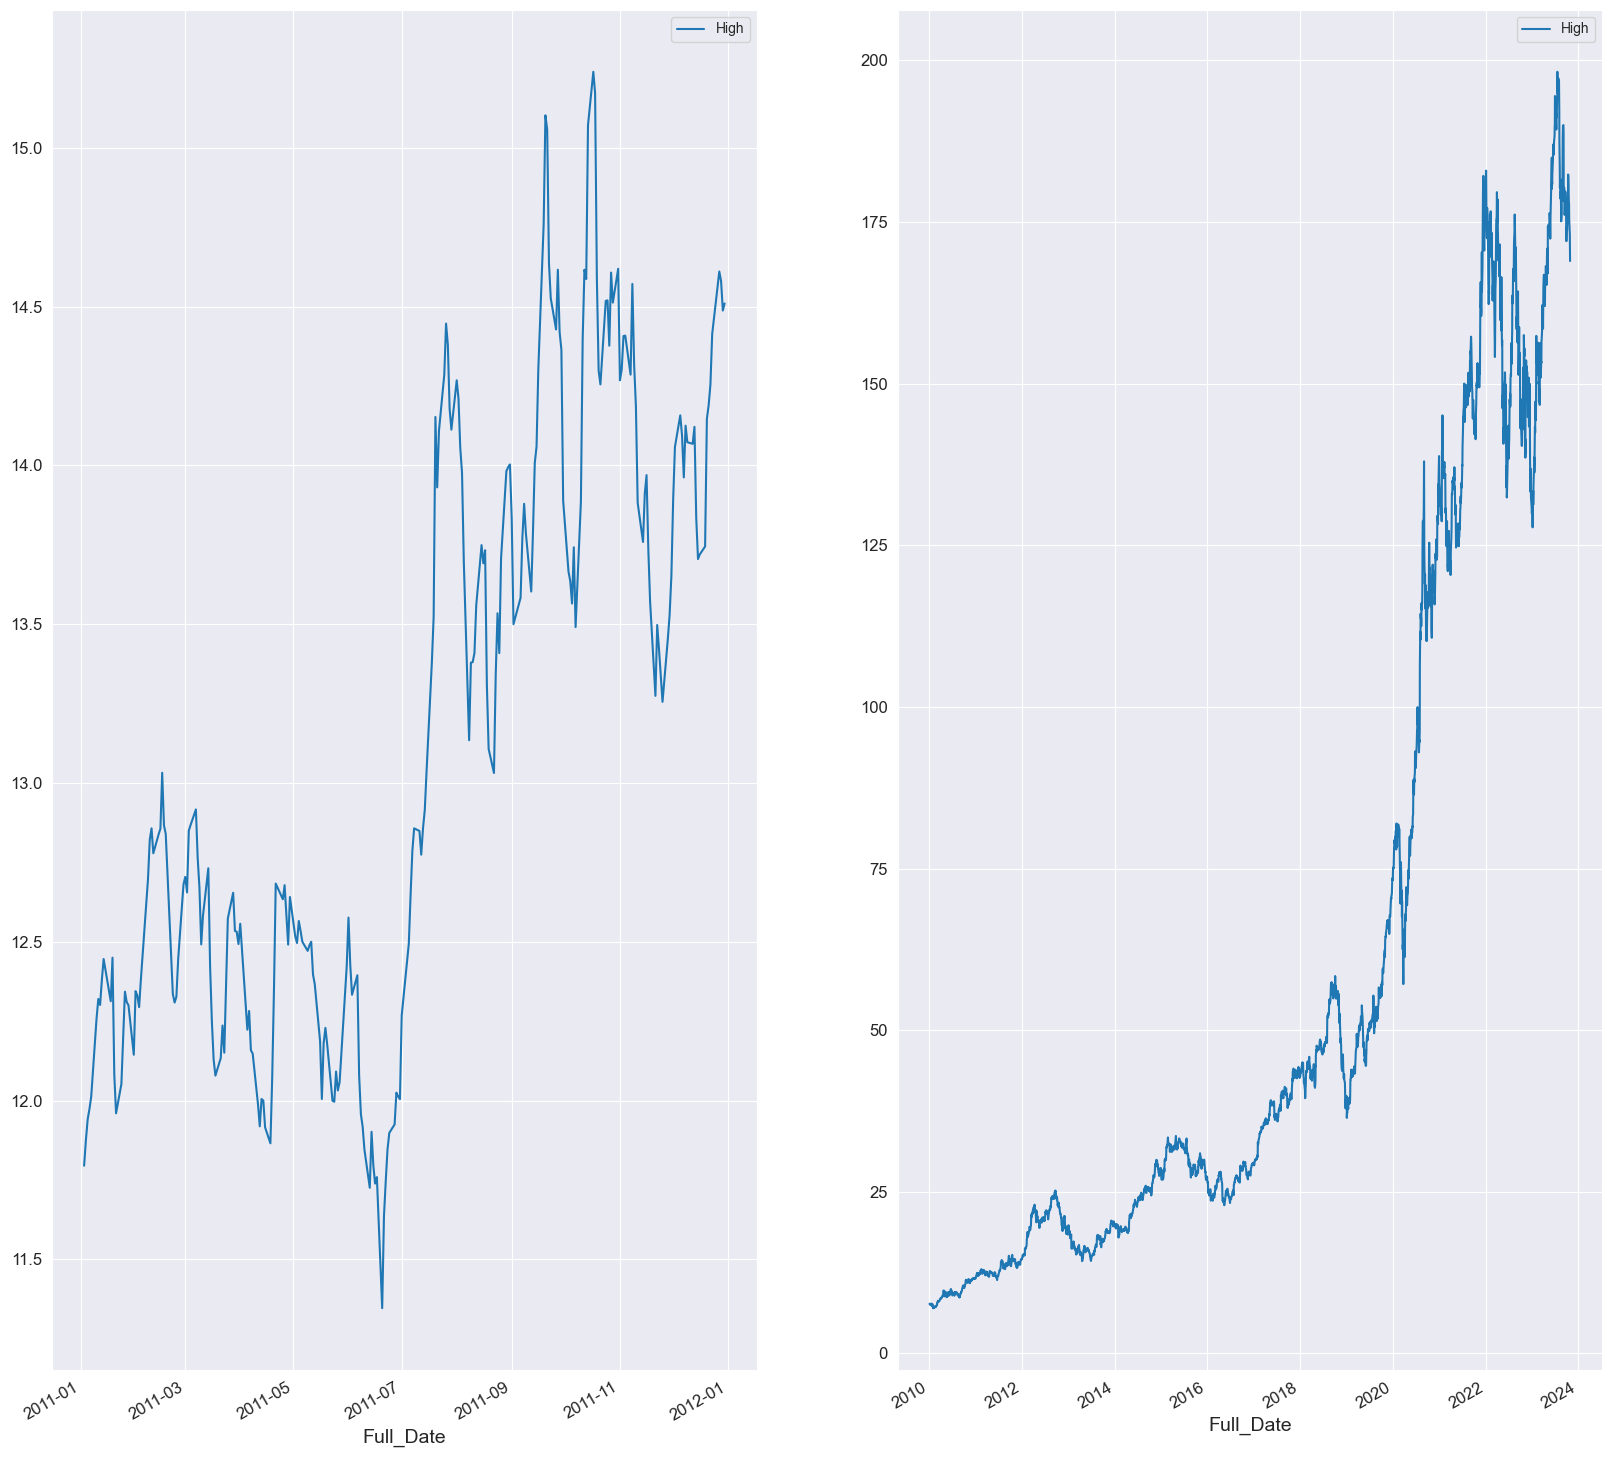

In [22]:
# Create a 'Date' column from 'year', 'Month', and 'Day_of_Week'
data['Full_Date'] = pd.to_datetime(data[['year', 'month','day']])

# Create the pivot table using 'Full_Date' as the index
pivot = data.pivot_table('High', 'Full_Date')

# Select and plot the data for 2011
fig , (ax1,ax2) = plt.subplots(1 , 2 , figsize=(20,20))
pivot[pivot.index.year == 2011].plot(ax=ax1)
pivot.plot(ax=ax2)

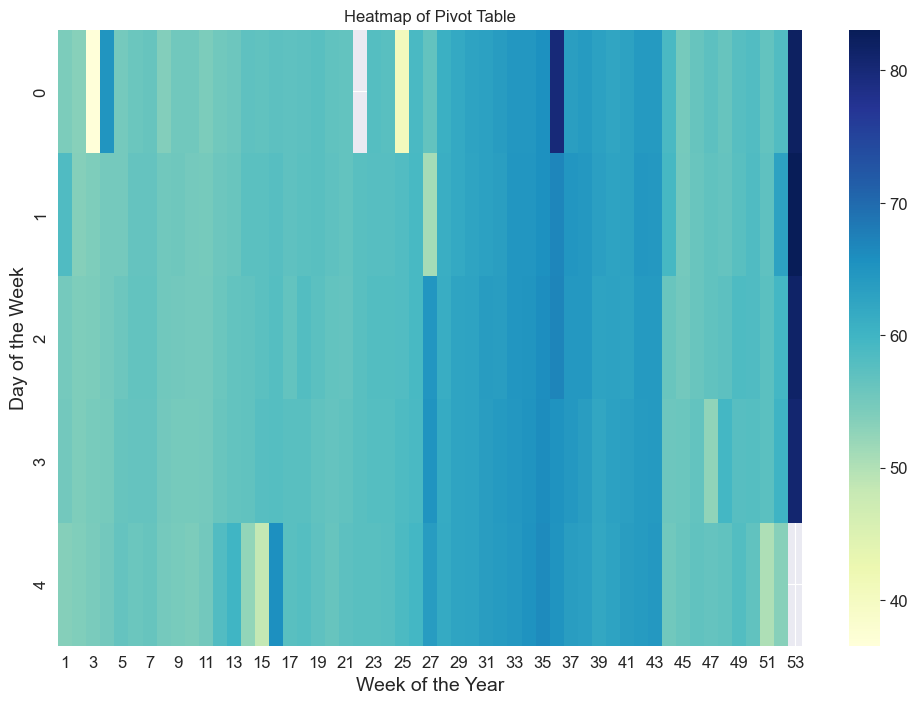

In [23]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the pivot table is assigned to the variable 'pivot_table'
pivot_table = pd.pivot_table(data, values='High', index=data['Date'].dt.dayofweek, columns=data['Date'].dt.isocalendar().week)

plt.figure(figsize=(12, 8))  # Set the figure size

sns.heatmap(pivot_table, cmap='YlGnBu')  # Create the heatmap

plt.title('Heatmap of Pivot Table')  # Set the title of the plot
plt.xlabel('Week of the Year')  # Label the x-axis
plt.ylabel('Day of the Week')  # Label the y-axis

plt.show()  # Display the plot

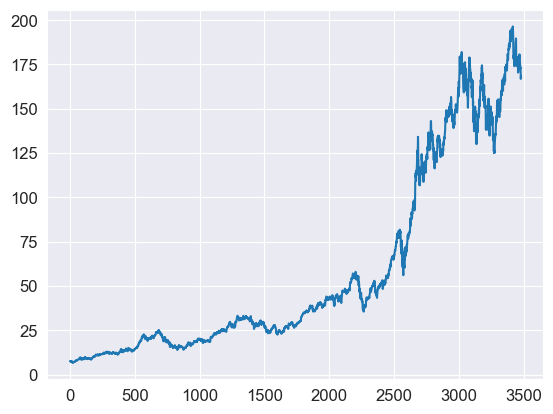

In [24]:
data['Close'].plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


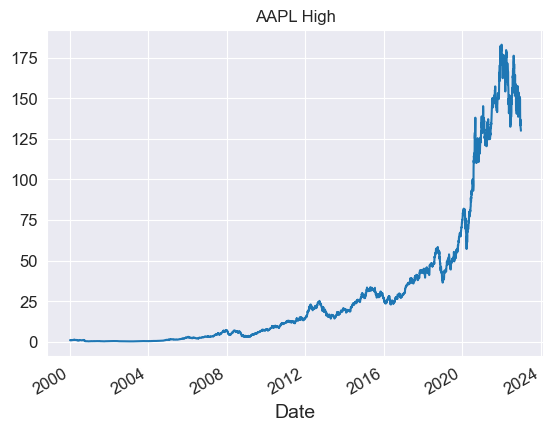

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical market data for AAPL
data = yf.download('AAPL', start='2000-01-01', end='2023-01-01')

# Plot the closing price
data['High'].plot()
plt.title('AAPL High')
plt.show()

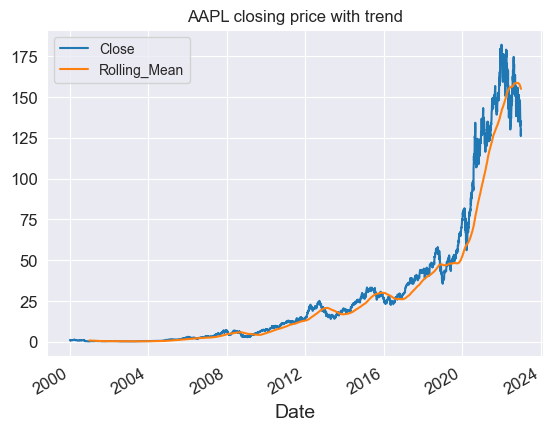

In [26]:
# Calculate and plot the rolling mean (trend)
data['Rolling_Mean'] = data['Close'].rolling(window=252).mean()  # 252 trading days in a year
data[['Close', 'Rolling_Mean']].plot()
plt.title('AAPL closing price with trend')
plt.show()

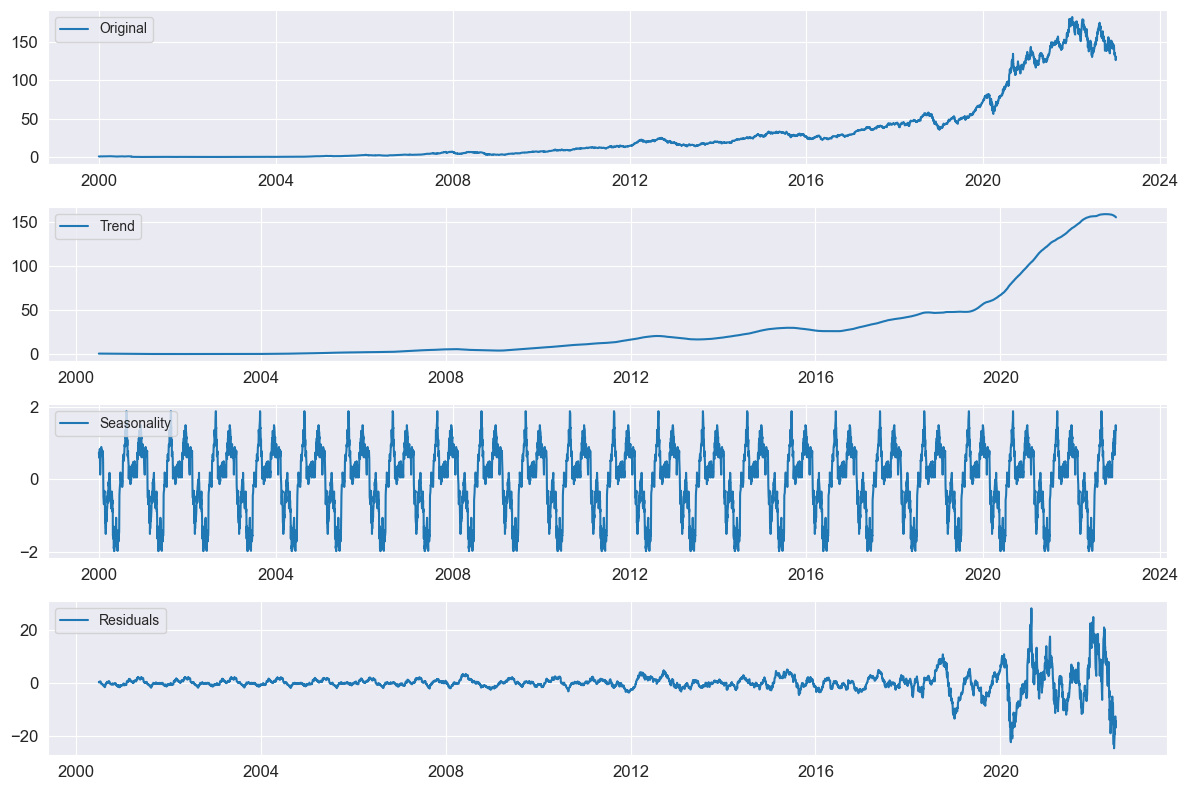

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'].dropna(), period=252)  # again using 252 for the number of trading days in a year

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [28]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(data['Close'].dropna())

Test Statistic                    0.640283
p-value                           0.988568
#Lags Used                       34.000000
Number of Observations Used    5752.000000
Critical Value (1%)              -3.431487
Critical Value (5%)              -2.862043
Critical Value (10%)             -2.567038
dtype: float64


In [29]:
dftest = adfuller(data['Close'].dropna(), autolag='AIC')
dftest

(0.6402833461506334,
 0.9885675833691838,
 34,
 5752,
 {'1%': -3.431487381900231,
  '5%': -2.862042614273643,
  '10%': -2.5670375396995615},
 16875.77082674427)

In [30]:
data['Close_diff'] = data['Close'].diff()

In [31]:
test_stationarity(data['Close_diff'].dropna())

Test Statistic                -1.324303e+01
p-value                        9.090085e-25
#Lags Used                     3.300000e+01
Number of Observations Used    5.752000e+03
Critical Value (1%)           -3.431487e+00
Critical Value (5%)           -2.862043e+00
Critical Value (10%)          -2.567038e+00
dtype: float64


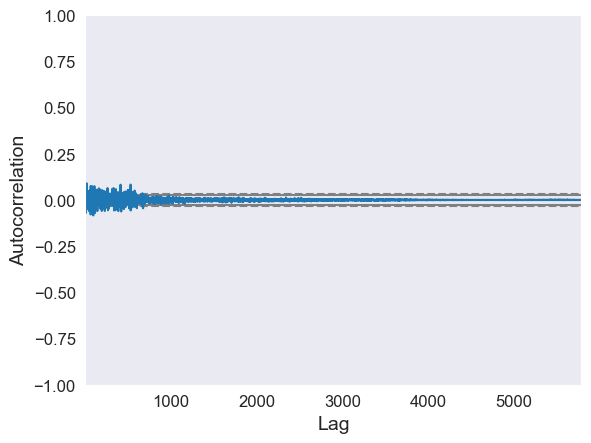

C:\Users\Omar Muhammed\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Omar Muhammed\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Omar Muhammed\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 5786
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8974.209
Date:                Fri, 10 Nov 2023   AIC                          17960.419
Time:                        05:04:21   BIC                          18000.397
Sample:                             0   HQIC                         17974.327
                               - 5786                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8887      0.005   -194.379      0.000      -0.898      -0.880
ar.L2         -0.7328      0.006   -122.235      0.000      -0.745      -0.721
ar.L3         -0.5743      0.006    -93.888      0.0

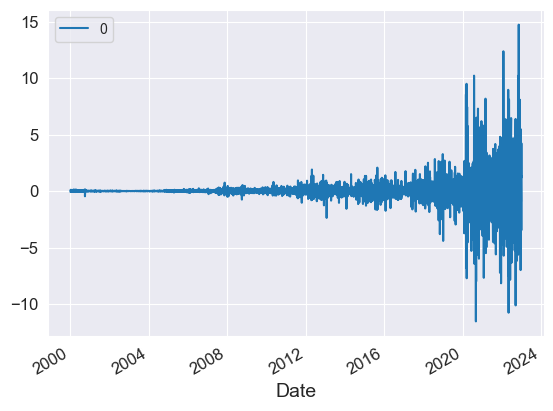

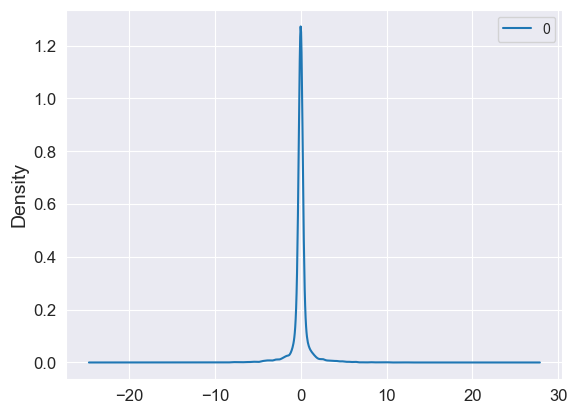

                 0
count  5786.000000
mean     -0.000167
std       1.141394
min     -11.541489
25%      -0.108050
50%      -0.001570
75%       0.101092
max      14.727861


In [32]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# First, let's look at the autocorrelation plot of the time series
autocorrelation_plot(data['Close_diff'].dropna())
plt.show()

# From the autocorrelation plot, we can choose to set the lag value for autoregression to 5
model = ARIMA(data['Close_diff'].dropna(), order=(5,1,0))
model_fit = model.fit()  # removed disp=0
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [33]:
from sklearn.metrics import mean_squared_error

# split into train and test sets
size = int(len(data['Close_diff']) * 0.66)
train, test = data['Close_diff'][0:size], data['Close_diff'][size:len(data['Close_diff'])]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



predicted=-0.225042, expected=-0.567501
predicted=-0.258933, expected=0.552500
predicted=-0.140854, expected=-0.215000
predicted=-0.182682, expected=0.340000
predicted=-0.049203, expected=0.522501
predicted=0.033519, expected=0.357500
predicted=0.087303, expected=-0.242500
predicted=0.244089, expected=-0.400000
predicted=0.057902, expected=0.327499
predicted=0.177876, expected=-0.129999
predicted=0.042350, expected=-0.827501
predicted=-0.166469, expected=0.215000
predicted=-0.100961, expected=-0.247499
predicted=-0.226431, expected=0.780001
predicted=0.015242, expected=-0.485001
predicted=-0.096708, expected=-0.045000
predicted=-0.140864, expected=0.267500
predicted=0.154382, expected=0.507500
predicted=0.051331, expected=-0.334999
predicted=0.132249, expected=-0.102501
predicted=-0.018574, expected=0.240000
predicted=0.115079, expected=0.135000
predicted=0.069766, expected=-0.062500
predicted=0.080066, expected=-0.137499
predicted=-0.032001, expected=0.119999
predicted=0.033001, expec

predicted=-0.504836, expected=0.127501
predicted=-0.428069, expected=0.392500
predicted=-0.269366, expected=0.357500
predicted=-0.253781, expected=-0.642500
predicted=-0.221720, expected=0.532499
predicted=-0.037894, expected=-0.597500
predicted=0.008584, expected=-0.117498
predicted=-0.020971, expected=0.032499
predicted=-0.023488, expected=-0.122499
predicted=-0.201803, expected=1.279999
predicted=0.212388, expected=-0.494999
predicted=-0.043925, expected=0.137499
predicted=0.122413, expected=-1.642500
predicted=-0.108824, expected=0.167500
predicted=-0.134012, expected=0.812500
predicted=0.102384, expected=-0.227499
predicted=-0.282265, expected=-0.487499
predicted=-0.180428, expected=0.467499
predicted=-0.144377, expected=0.062500
predicted=0.104234, expected=-0.645000
predicted=-0.008359, expected=0.247501
predicted=-0.057188, expected=-0.005001
predicted=-0.081253, expected=-0.180000
predicted=-0.023737, expected=-0.142500
predicted=-0.082567, expected=0.072500
predicted=-0.12093

predicted=-0.103224, expected=0.162498
predicted=-0.126018, expected=-0.045000
predicted=-0.029349, expected=-0.772499
predicted=-0.181008, expected=0.160000
predicted=-0.044939, expected=-0.680000
predicted=-0.132902, expected=0.350000
predicted=-0.121097, expected=0.719999
predicted=-0.005745, expected=-0.010000
predicted=-0.098267, expected=0.027500
predicted=0.107614, expected=0.417501
predicted=0.128807, expected=0.017500
predicted=0.235397, expected=-0.142500
predicted=0.182304, expected=0.139999
predicted=0.086391, expected=-0.055000
predicted=0.055197, expected=-0.027500
predicted=0.066744, expected=-0.235001
predicted=-0.049270, expected=-0.257500
predicted=-0.104459, expected=0.102501
predicted=-0.037330, expected=-0.197500
predicted=-0.119402, expected=0.209999
predicted=-0.056567, expected=0.270000
predicted=-0.012459, expected=0.272501
predicted=0.051664, expected=0.457499
predicted=0.197198, expected=-0.162498
predicted=0.113946, expected=0.472500
predicted=0.265280, expe

predicted=-0.144693, expected=-0.302502
predicted=-0.133474, expected=-0.342499
predicted=-0.127491, expected=0.400002
predicted=-0.039394, expected=-0.302502
predicted=-0.015935, expected=0.014999
predicted=-0.125636, expected=-0.664997
predicted=-0.191367, expected=-0.670002
predicted=-0.262159, expected=-0.375000
predicted=-0.241517, expected=-0.334999
predicted=-0.390099, expected=0.647499
predicted=-0.225043, expected=0.272499
predicted=-0.204078, expected=-0.237499
predicted=-0.151379, expected=0.209999
predicted=0.051135, expected=-0.077499
predicted=0.087066, expected=0.167500
predicted=0.158306, expected=-0.250000
predicted=0.012403, expected=0.477501
predicted=0.056945, expected=-0.022499
predicted=0.081987, expected=0.134998
predicted=0.057751, expected=0.014999
predicted=0.097313, expected=0.162502
predicted=0.085878, expected=-0.137501
predicted=0.102312, expected=0.247501
predicted=0.070960, expected=0.722500
predicted=0.203957, expected=0.147499
predicted=0.168971, expec

predicted=0.074909, expected=0.134998
predicted=0.102400, expected=-0.262501
predicted=-0.022798, expected=0.370003
predicted=0.168024, expected=-0.110001
predicted=0.012899, expected=0.042500
predicted=-0.001594, expected=0.347500
predicted=0.121050, expected=0.455002
predicted=0.130748, expected=-0.152500
predicted=0.138443, expected=-0.807503
predicted=-0.043961, expected=-0.267498
predicted=-0.034086, expected=0.094997
predicted=-0.062974, expected=2.802502
predicted=0.408085, expected=1.472500
predicted=0.496392, expected=0.150002
predicted=0.500704, expected=0.270000
predicted=0.863463, expected=-0.490002
predicted=0.677223, expected=0.035000
predicted=0.681798, expected=0.407501
predicted=0.333939, expected=-0.337502
predicted=-0.049791, expected=0.334999
predicted=0.068541, expected=0.220001
predicted=0.049338, expected=0.122501
predicted=0.100139, expected=0.770000
predicted=0.297986, expected=1.064999
predicted=0.385056, expected=-0.529999
predicted=0.255624, expected=-0.1050

predicted=-0.485693, expected=-1.477501
predicted=-0.603439, expected=0.877502
predicted=0.111686, expected=-0.955002
predicted=-0.270439, expected=-0.779999
predicted=-0.499195, expected=-0.172501
predicted=-0.411483, expected=-0.185001
predicted=-0.459888, expected=-0.212498
predicted=-0.261043, expected=0.230000
predicted=-0.350188, expected=-0.807499
predicted=-0.344020, expected=-0.442501
predicted=-0.248800, expected=1.584999
predicted=0.069071, expected=0.724998
predicted=0.102283, expected=0.670002
predicted=0.263590, expected=1.232498
predicted=0.509135, expected=0.607502
predicted=0.711033, expected=0.557499
predicted=0.896096, expected=-0.154999
predicted=0.618659, expected=-0.010002
predicted=0.511581, expected=-0.352497
predicted=0.333302, expected=0.287498
predicted=0.173503, expected=1.139999
predicted=0.252459, expected=-0.145000
predicted=0.068493, expected=0.397503
predicted=0.222452, expected=-0.170002
predicted=0.209443, expected=-0.049999
predicted=0.250574, expect

predicted=-0.356790, expected=-1.217503
predicted=-2.175127, expected=5.627502
predicted=-1.318654, expected=-0.340000
predicted=-0.373888, expected=3.230000
predicted=-0.069612, expected=-2.674999
predicted=0.938692, expected=1.767498
predicted=1.320994, expected=-0.130001
predicted=1.136995, expected=-3.344997
predicted=0.612274, expected=1.004997
predicted=-0.701911, expected=-0.879997
predicted=-0.411775, expected=5.264999
predicted=-0.540971, expected=-0.760002
predicted=0.280950, expected=1.660004
predicted=0.677644, expected=0.479996
predicted=1.169297, expected=1.315002
predicted=1.573113, expected=3.449997
predicted=1.040653, expected=-0.654999
predicted=1.533656, expected=0.565002
predicted=1.144306, expected=-0.972504
predicted=1.102993, expected=-1.467499
predicted=0.817067, expected=-2.139999
predicted=-0.297082, expected=1.932503
predicted=-0.912126, expected=-0.267502
predicted=-0.500245, expected=1.985001
predicted=-0.560814, expected=0.050003
predicted=0.087901, expect

predicted=1.459051, expected=3.849991
predicted=2.374525, expected=0.240005
predicted=3.260333, expected=-1.100006
predicted=2.702589, expected=-4.970001
predicted=1.106160, expected=-5.129990
predicted=-0.746895, expected=2.179993
predicted=-1.669245, expected=0.850006
predicted=-1.388319, expected=-1.050003
predicted=-1.661870, expected=3.449997
predicted=-1.110456, expected=-0.630005
predicted=0.677569, expected=0.150009
predicted=0.736046, expected=-0.900009
predicted=0.257147, expected=-0.619995
predicted=0.321548, expected=-0.259995
predicted=-0.095526, expected=0.239990
predicted=-0.329760, expected=-2.179993
predicted=-0.473558, expected=-2.350006
predicted=-0.965771, expected=-1.129990
predicted=-1.138921, expected=0.159988
predicted=-1.004831, expected=-3.869995
predicted=-1.366216, expected=-0.139999
predicted=-1.842037, expected=-0.510002
predicted=-1.250864, expected=-4.360001
predicted=-1.247653, expected=0.270004
predicted=-1.974037, expected=6.529999
predicted=-0.702013

predicted=1.986765, expected=0.389999
predicted=2.065979, expected=0.529999
predicted=1.991686, expected=-5.130005
predicted=0.977128, expected=3.430008
predicted=-0.177124, expected=5.059998
predicted=0.621062, expected=-0.529999
predicted=0.715033, expected=-1.010010
predicted=0.306639, expected=-1.919998
predicted=0.463783, expected=3.480011
predicted=1.212032, expected=5.859985
predicted=1.379912, expected=3.900009
predicted=1.378649, expected=-0.520004
predicted=1.695216, expected=4.889999
predicted=2.524405, expected=-3.709991
predicted=3.153206, expected=-1.410004
predicted=1.466880, expected=4.970001
predicted=1.043104, expected=-7.040009
predicted=0.497663, expected=-1.119995
predicted=-0.970584, expected=-1.389999
predicted=-1.467018, expected=3.240005
predicted=-0.706265, expected=2.649994
predicted=-0.284138, expected=0.639999
predicted=-0.470171, expected=4.050003
predicted=1.067638, expected=-1.040009
predicted=1.826913, expected=0.090012
predicted=1.597534, expected=-1.1

predicted=0.156949, expected=0.340012
predicted=-0.121714, expected=0.989990
predicted=-0.764846, expected=-1.919998
predicted=-1.114886, expected=-7.360001
predicted=-1.481258, expected=-4.279999
predicted=-2.035211, expected=4.250000
predicted=-1.579106, expected=3.650009
predicted=-1.437211, expected=0.299988
predicted=-1.530703, expected=-0.970001
predicted=-0.622751, expected=-5.339996
predicted=0.359161, expected=0.330002
predicted=0.561757, expected=-1.440002
predicted=-0.501000, expected=-0.639999
predicted=-1.515447, expected=4.650009
predicted=-1.086031, expected=-4.610001
predicted=-0.867889, expected=4.029999
predicted=-0.030657, expected=1.339996
predicted=0.653432, expected=0.110001
predicted=0.902179, expected=-0.470001
predicted=0.638426, expected=3.880005
predicted=0.815021, expected=2.179993
predicted=1.715957, expected=2.889999
predicted=1.394610, expected=-2.989990
predicted=1.197251, expected=-4.550003
predicted=0.711754, expected=10.940002
predicted=1.587125, expe

Test RMSE: 1.958


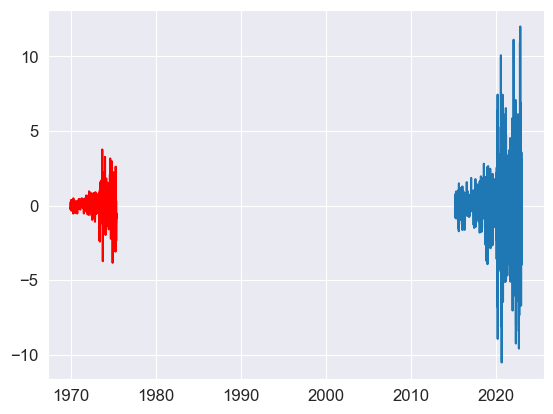

In [34]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [35]:
min_value = data['Close_diff'].min()
max_value = data['Close_diff'].max()

print('Min:', min_value)
print('Max:', max_value)

Min: -10.519996643066406
Max: 12.0


In [36]:
data['Close_diff'][0:size]

Date
2000-01-03         NaN
2000-01-04   -0.084263
2000-01-05    0.013392
2000-01-06   -0.080357
2000-01-07    0.040179
                ...   
2015-03-04   -0.205002
2015-03-05   -0.532497
2015-03-06    0.047499
2015-03-09    0.135000
2015-03-10   -0.657499
Name: Close_diff, Length: 3819, dtype: float64

# project 2 

In [37]:
data = pd.read_csv('archive/creditcard.csv')

In [38]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64